In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import datetime
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

font_name = font_manager.FontProperties(fname='./malgun.ttf').get_name()
rc('font', family=font_name)

C:\Users\hajae\anaconda3\envs\pydatavenv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hajae\anaconda3\envs\pydatavenv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\hajae\anaconda3\envs\pydatavenv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
pop = pd.read_csv('./data_missing/LOCAL_PEOPLE_DONG_202104.csv', sep=',', encoding='utf-8')

In [3]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305280 entries, 20210401 to 20210430
Data columns (total 32 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   기준일ID            305280 non-null  int64  
 1   시간대구분            305280 non-null  int64  
 2   행정동코드            305280 non-null  float64
 3   총생활인구수           305280 non-null  float64
 4   남자0세부터9세생활인구수    305280 non-null  float64
 5   남자10세부터14세생활인구수  305280 non-null  float64
 6   남자15세부터19세생활인구수  305280 non-null  float64
 7   남자20세부터24세생활인구수  305280 non-null  float64
 8   남자25세부터29세생활인구수  305280 non-null  float64
 9   남자30세부터34세생활인구수  305280 non-null  float64
 10  남자35세부터39세생활인구수  305280 non-null  float64
 11  남자40세부터44세생활인구수  305280 non-null  float64
 12  남자45세부터49세생활인구수  305280 non-null  float64
 13  남자50세부터54세생활인구수  305280 non-null  float64
 14  남자55세부터59세생활인구수  305280 non-null  float64
 15  남자60세부터64세생활인구수  305280 non-null  float64
 16  남자65세부터69세생활인구수  305280 non-n

In [4]:
pop.drop('여자70세이상생활인구수', axis=1, inplace=True)

pop.columns = ['시간대구분', '행정동코드', '총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수']

col = pop.columns.to_list()
col_list = ['기준일ID']

col_list += col

pop.reset_index(inplace=True)
pop.columns = col_list

pop.to_csv('./result/LOCAL_PEOPLE_DONG_202104.csv', sep=',', index=False)

In [11]:
pop['dt'] = pd.to_datetime(pop['기준일ID'], format='%Y%m%d')

In [12]:
pop['day'] = pop['dt'].apply(lambda x: x.weekday())

In [13]:
pop['시군구코드'] = pop['행정동코드'].apply(lambda x: str(x)[:5])

In [14]:
pop # 0:월 ~ 6:일

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,dt,day,시군구코드
0,20210401,0,11110515,14873.1982,602.3832,383.8400,535.8347,553.7652,530.7740,396.5789,...,693.7746,861.9437,600.1604,632.1456,453.5299,345.1157,1186.8875,2021-04-01,3,11110
1,20210401,0,11110530,14159.7732,347.8451,154.5978,232.2184,304.4984,444.4055,521.9984,...,619.5901,666.2301,514.9279,586.1257,448.9507,378.2353,1237.9744,2021-04-01,3,11110
2,20210401,0,11110550,15755.8971,410.0953,317.9823,482.2501,496.6997,429.3962,384.6177,...,633.5898,929.7034,692.2973,680.0663,637.3613,445.5792,1393.1079,2021-04-01,3,11110
3,20210401,0,11110600,4741.5891,105.2852,74.3186,137.0356,180.5186,127.0945,152.7587,...,220.7126,246.0462,203.1009,226.9929,118.0450,114.9134,422.0107,2021-04-01,3,11110
4,20210401,0,11110700,7655.1287,198.2186,93.9423,107.1708,203.3314,269.2509,268.7025,...,320.3232,297.7554,381.1562,373.1998,276.7928,219.9131,523.5031,2021-04-01,3,11110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305275,20210430,23,11650540,32088.3266,1216.8934,811.7812,889.4200,774.1607,809.8825,1000.0677,...,1755.7508,1756.6384,1232.4821,1023.0105,875.8024,637.9602,1636.1533,2021-04-30,4,11650
305276,20210430,23,11410620,25995.3234,832.5746,461.1960,759.9269,751.4907,769.7284,788.6418,...,900.8529,1087.4637,1101.1897,1287.6310,1064.3715,671.0912,2336.6303,2021-04-30,4,11410
305277,20210430,23,11545610,31375.7054,937.6252,309.0739,393.2976,975.4301,1815.8817,1897.8340,...,1137.7056,1040.0987,957.2480,1210.0173,815.9064,716.0609,1796.1346,2021-04-30,4,11545
305278,20210430,23,11170700,12071.7646,198.4818,134.8070,207.2134,432.6455,656.4124,629.6753,...,466.8046,516.7693,436.0011,421.9003,445.2686,350.0671,787.8535,2021-04-30,4,11170


In [15]:
pop.columns

Index(['기준일ID', '시간대구분', '행정동코드', '총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수',
       'dt', 'day', '시군구코드'],
      dtype='object')

In [16]:
mapping = {'11110': '종로구', '11140': '중구', '11170': '용산구', '11200': '성동구', '11215': '광진구',
           '11230': '동대문구', '11260': '중랑구', '11290': '성북구', '11305': '강북구', '11320': '도봉구',
           '11350': '노원구', '11380': '은평구', '11410': '서대문구', '11440': '마포구', '11470': '양천구',
           '11500': '강서구', '11530': '구로구', '11545': '금천구', '11560': '영등포구', '11590': '동작구',
           '11620': '관악구', '11650': '서초구', '11680': '강남구', '11710': '송파구', '11740': '강동구'}

In [17]:
pop['10세미만생활인구'] = pop['남자0세부터9세생활인구수'] + pop['여자0세부터9세생활인구수']

In [18]:
pop['자치구'] = pop['시군구코드'].map(mapping)

In [19]:
m_pop = pop.groupby(['day', '시간대구분', '시군구코드', '행정동코드', '자치구'])[['총생활인구수', '10세미만생활인구']].mean()

## 요일별

In [20]:
m_pop.reset_index(inplace=True)

In [21]:
m_pop

,day,시간대구분,시군구코드,행정동코드,자치구,총생활인구수,10세미만생활인구
0,0,0,11110,11110515,종로구,14755.294875,1089.440200
1,0,0,11110,11110530,종로구,13454.987225,718.763550
2,0,0,11110,11110540,종로구,4332.876900,189.386675
3,0,0,11110,11110550,종로구,15923.533350,806.180375
4,0,0,11110,11110560,종로구,19763.265425,1380.594475
...,...,...,...,...,...,...,...
71227,6,23,11740,11740650,강동구,27809.633550,1691.213050
71228,6,23,11740,11740660,강동구,27714.869775,1561.225225
71229,6,23,11740,11740685,강동구,54220.458900,3646.449575
71230,6,23,11740,11740690,강동구,7812.260625,588.797175


In [22]:
시군구_요일별 = m_pop.groupby(['시군구코드', '자치구', 'day'])[['총생활인구수', '10세미만생활인구']].mean().reset_index()

In [23]:
시군구_요일별

,시군구코드,자치구,day,총생활인구수,10세미만생활인구
0,11110,종로구,0,16980.931619,587.534214
1,11110,종로구,1,17241.034000,581.374480
2,11110,종로구,2,17294.783736,583.197765
3,11110,종로구,3,17307.358487,581.974168
4,11110,종로구,4,16980.663892,578.392222
...,...,...,...,...,...
170,11740,강동구,2,27606.285962,2253.287614
171,11740,강동구,3,27591.713092,2254.267617
172,11740,강동구,4,27624.245910,2247.056327
173,11740,강동구,5,28063.768328,2171.398261


In [24]:
시군구_요일별.to_csv('./result/자치구 요일별 총생활인구.csv', sep=',', index=False)

In [25]:
종로구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11110']
중구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11140']
용산구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11170']
성동구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11200']
광진구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11215']
동대문구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11230']
중랑구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11260']
성북구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11290']
강북구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11305']
도봉구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11320']
노원구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11350']
은평구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11380']
서대문구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11410']
마포구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11440']
양천구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11470']
강서구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11500']
구로구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11530']
금천구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11545']
영등포구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11560']
동작구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11590']
관악구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11620']
서초구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11650']
강남구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11680']
송파구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11710']
강동구 = 시군구_요일별[시군구_요일별['시군구코드'] == '11740']

### 종로구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

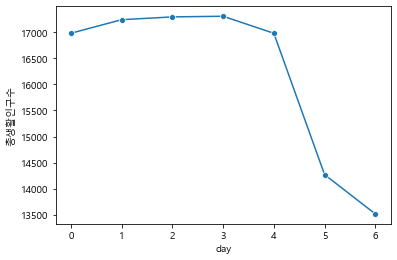

In [26]:
sns.lineplot(x='day', y='총생활인구수', data=종로구, marker='o')

### 중구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

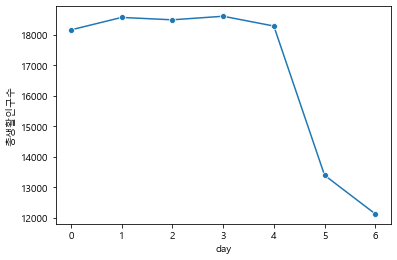

In [27]:
sns.lineplot(x='day', y='총생활인구수', data=중구, marker='o')

### 용산구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

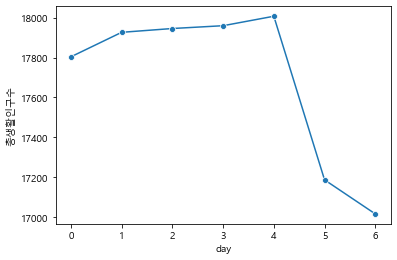

In [28]:
sns.lineplot(x='day', y='총생활인구수', data=용산구, marker='o')

### 성동구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

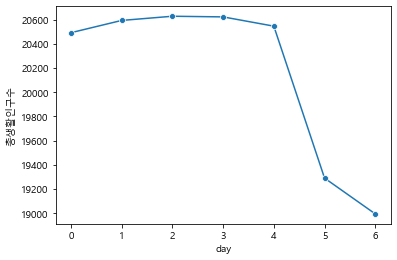

In [29]:
sns.lineplot(x='day', y='총생활인구수', data=성동구, marker='o')

### 광진구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

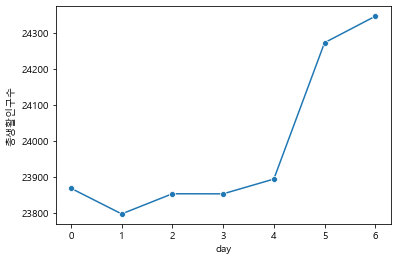

In [30]:
sns.lineplot(x='day', y='총생활인구수', data=광진구, marker='o')

### 동대문구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

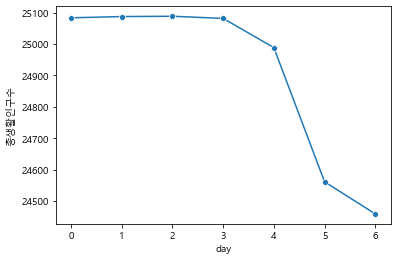

In [31]:
sns.lineplot(x='day', y='총생활인구수', data=동대문구, marker='o')

### 중랑구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

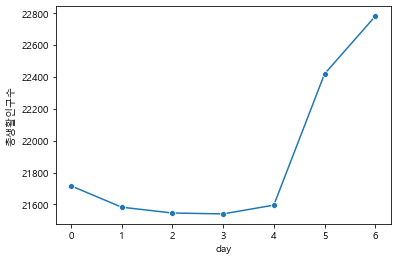

In [32]:
sns.lineplot(x='day', y='총생활인구수', data=중랑구, marker='o')

### 성북구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

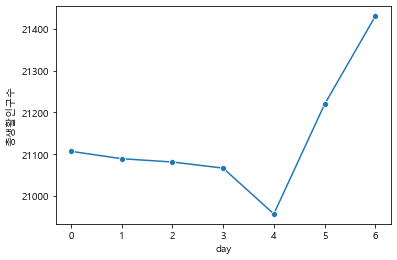

In [33]:
sns.lineplot(x='day', y='총생활인구수', data=성북구, marker='o')

### 강북구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

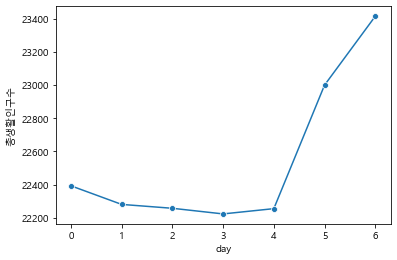

In [34]:
sns.lineplot(x='day', y='총생활인구수', data=강북구, marker='o')

### 도봉구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

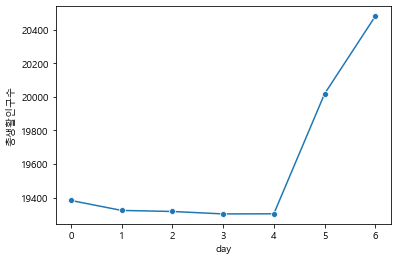

In [35]:
sns.lineplot(x='day', y='총생활인구수', data=도봉구, marker='o')

### 노원구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

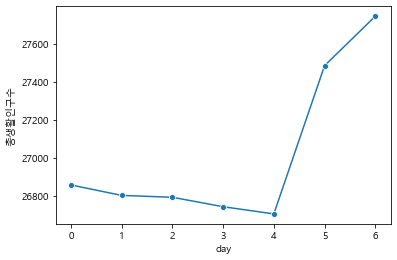

In [36]:
sns.lineplot(x='day', y='총생활인구수', data=노원구, marker='o')

### 은평구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

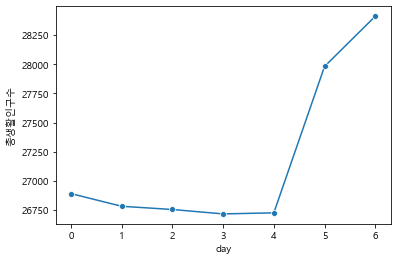

In [37]:
sns.lineplot(x='day', y='총생활인구수', data=은평구, marker='o')

### 서대문구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

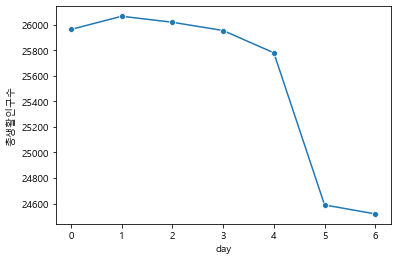

In [38]:
sns.lineplot(x='day', y='총생활인구수', data=서대문구, marker='o')

### 마포구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

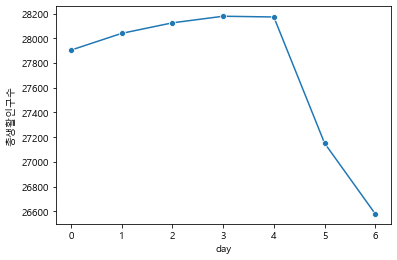

In [39]:
sns.lineplot(x='day', y='총생활인구수', data=마포구, marker='o')

### 양천구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

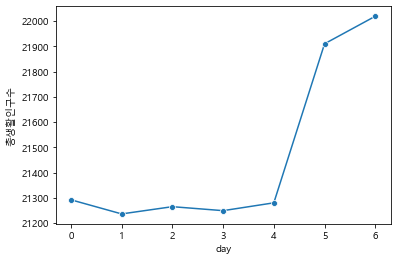

In [40]:
sns.lineplot(x='day', y='총생활인구수', data=양천구, marker='o')

### 강서구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

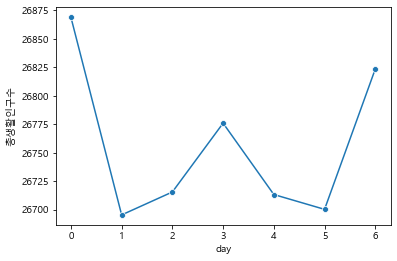

In [41]:
sns.lineplot(x='day', y='총생활인구수', data=강서구, marker='o')

### 구로구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

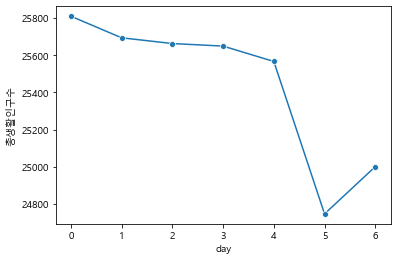

In [42]:
sns.lineplot(x='day', y='총생활인구수', data=구로구, marker='o')

### 금천구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

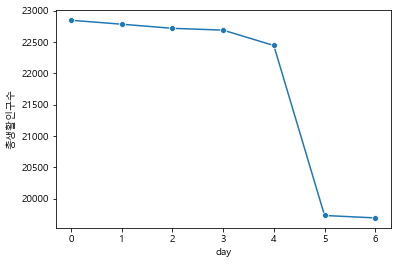

In [43]:
sns.lineplot(x='day', y='총생활인구수', data=금천구, marker='o')

### 영등포구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

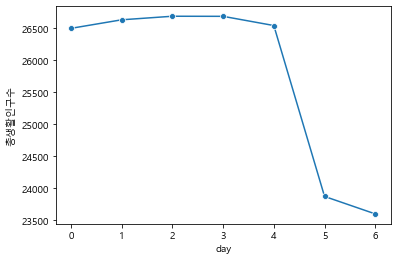

In [44]:
sns.lineplot(x='day', y='총생활인구수', data=영등포구, marker='o')

### 동작구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

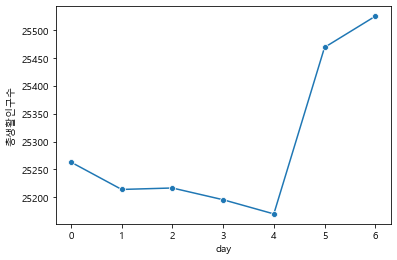

In [45]:
sns.lineplot(x='day', y='총생활인구수', data=동작구, marker='o')

### 관악구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

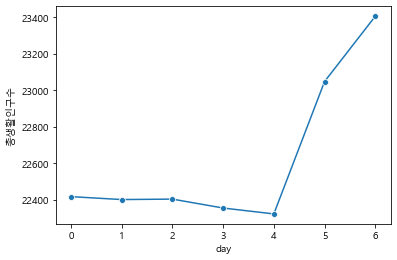

In [46]:
sns.lineplot(x='day', y='총생활인구수', data=관악구, marker='o')

### 서초구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

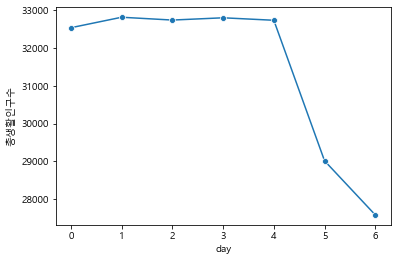

In [47]:
sns.lineplot(x='day', y='총생활인구수', data=서초구, marker='o')

### 강남구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

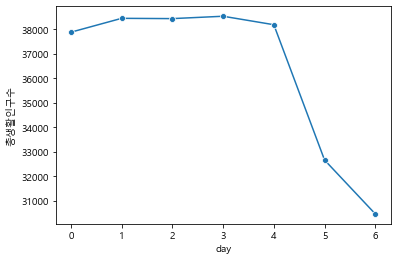

In [48]:
sns.lineplot(x='day', y='총생활인구수', data=강남구, marker='o')

### 송파구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

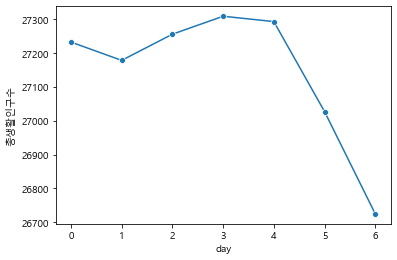

In [49]:
sns.lineplot(x='day', y='총생활인구수', data=송파구, marker='o')

### 강동구

<AxesSubplot:xlabel='day', ylabel='총생활인구수'>

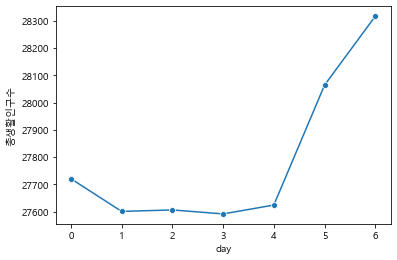

In [50]:
sns.lineplot(x='day', y='총생활인구수', data=강동구, marker='o')